<a href="https://colab.research.google.com/github/KeerHu73/wrangling/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1.Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [30]:
#question1
import pandas as pd
import numpy as np
import seaborn as sns
url = "https://raw.githubusercontent.com/KeerHu73/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv"
df = pd.read_csv(url,low_memory=False)

##Check the original format of the Price variable
print( df.shape, '\n')
df.head()


(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [31]:
#When checking the unique values of "Price", it was found that they contain commas
price = df['Price']
print(price.unique())
#These imported data are strings. The next step will be to remove commas in values.


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [32]:
price = df['Price']
price = price.str.replace(',', '') # Replace commas with nothing
price = pd.to_numeric(price, errors='coerce') #convert strings to numeric
print(price.unique(), '\n')

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

2. Categorical variable: For the Minnesota police use of for data, ./data/mn_police_use_of_force.csv, clean the subject_injury variable, handling the NA's; this gives a value Yes when a person was injured by police, and No when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned subject_injury variable with the force_type variable. Are there any patterns regarding when the data are missing?

In [ ]:
import pandas as pd

url= "https://raw.githubusercontent.com/KeerHu73/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv"
df = pd.read_csv(url,low_memory=False)

#print(df['subject_injury'].head())
#print(df['subject_injury'].dtype)
#print(df['subject_injury'].unique())
print(df['subject_injury'].value_counts(dropna=False))


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


In [ ]:
df['subject_injury'] = df['subject_injury'].fillna('No')
print(df['subject_injury'].value_counts())

subject_injury
No     11294
Yes     1631
Name: count, dtype: int64


In [ ]:
#calculate the proportion;
missing_proportion = (df['subject_injury'] == 'No').sum() / len(df)
print("The proportion of the values are missing is:", missing_proportion)

The proportion of the values are missing is: 0.8738104448742746


In [ ]:
#cross tabulation:
cross_tab = pd.crosstab(df['subject_injury'], df['force_type'])
print(cross_tab)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          33   1135  
Yes                         44    172  


3.Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

In [ ]:
import pandas as pd

url = "http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv"
df = pd.read_csv(url, low_memory=False)
print(df.head())
print(df.columns,'\n')
print(df.columns.tolist())



  InternalStudyID REQ_REC# Defendant_Sex Defendant_Race Defendant_BirthYear  \
0        ADI00001        1             M              W                1986   
1        ADI00007        3             M              B                1956   
2        ADI00008        4             M              W                1990   
3        CDI00036        6             M              B                1989   
4        CDI00038        7             F              W                1988   

  Defendant_Age  Defendant_AgeGroup Defendant_AgeatCurrentArrest  \
0            31                   3                           31   
1            60                   6                           60   
2            27                   3                           27   
3            27                   3                           27   
4            28                   3                           28   

   Defendant_AttorneyTypeAtCaseClosure  Defendant_IndigencyStatus  ...  \
0                                   99    

In [ ]:
release = df['WhetherDefendantWasReleasedPretrial'] #select this variable and store it to release
print(release.unique(),'\n') #list all unique values of the variable
#I got [9 0 1]: it shows that '9' is unclear
print(release.value_counts(),'\n')
release = release.replace(9,np.nan) #clear the 9, replace 9 with NaN
print(release.value_counts(),'\n')#double check
sum(release.isnull()) #count the number of NaNs to see how many 9s were correctly replaced.
df['WhetherDefendantWasReleasedPretrial'] = release # Replace data column with cleaned values
del release




[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



4.Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [ ]:
#Select relevant variables from the dataset
sentence_length = df['ImposedSentenceAllChargeInContactEvent']
sentence_type = df['SentenceTypeAllChargesAtConvictionInContactEvent']

# Convert the sentence length to numeric, forcing errors to NAN
#It may contain non-numeric characters (such as spaces，comma....)
sentence_length = pd.to_numeric(sentence_length, errors='coerce')
#Create a missing dummy:
missing_length = sentence_length.isnull()
print( np.sum(missing_length),'\n')# The missing values are 9053 (that's too much)

#Cross-tabulation of missing values and sentence type
print(pd.crosstab(missing_length, sentence_type), "\n")

#Replace sentence length with 0 when sentence type == 4 (charges dismissed)
sentence_length.loc[sentence_type == 4] = 0  # Case dismissed → 0 sentence

# Replace sentence length with NaN when sentence type == 9 (unknown cases)
sentence_length.loc[sentence_type == 9] = np.nan  # Unknown cases → NaN

# Recalculate missing values
df['ImposedSentenceAllChargeInContactEvent'] = sentence_length
new_missing_length = df['ImposedSentenceAllChargeInContactEvent'].isnull()

print(pd.crosstab(new_missing_length, df['SentenceTypeAllChargesAtConvictionInContactEvent']), "\n")

# update, after cleaning, only 274 are missing values
df['ImposedSentenceAllChargeInContactEvent'] = sentence_length
del sentence_length, sentence_type






274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel("/content/shark_attacks.xls") # I uploaded this excel to my assignment section in Github

print(df.head())






                  Date    Year        Type        Country              State  \
0  2025-01-23 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
1  2025-01-22 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
2  2025-01-11 00:00:00  2025.0    Provoked            USA             Hawaii   
3  2025-01-02 00:00:00  2025.0  Unprovoked  New Caledonia       Grande Terre   
4  2025-01-02 00:00:00  2025.0  Unprovoked      Australia    South Australia   

                                  Location      Activity  \
0                           Shipwreck Cove       Bathing   
1                           Cheynes beach        Surfing   
2            Off Haleiwa Boat Harbour Oahu        Diving   
3              Islet of Kendek near Koumac  Spearfishing   
4  Granites Beach near Westall Streaky Bay       Surfing   

                                     Name Sex Age  ...  \
0                                    Boy    M  12  ...   
1                             Dale Kittow 

2. Drop any columns that do not contain data.

In [4]:
# create an empty list to store columns that are completely empty (all NaN values)
empty_columns = []

# loop through all columns in the dataframe
for col in df.columns:
    # count the number of missing (NaN) values in the column
    missing_count = df[col].isnull().sum()

    # check if the entire column is missing (i.e., all values are NaN)
    if missing_count == len(df):
        # if the column is completely empty, add it to the empty_columns list
        empty_columns.append(col)

# use df.drop() to remove the identified empty columns
df = df.drop(empty_columns, axis=1)

3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [18]:
df['Year'] = df['Year'].astype(str).str.strip()
#print(df['Year'].head())
#print(df['Year'].dtype)
#My "Year" column is of type float64, indicating that it is a floating-point number (not a string).
#I converted it to an integer to remove the decimal point


print(df['Year'].unique())
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # clean data
df = df[df['Year'] >= 1940] # only need attacks since 1940

attack_counts = df['Year'].value_counts().sort_index()  # Count and sort by year
print(attack_counts) # I cannot get full data in this step, so i choose for loop in following step

for year, count in attack_counts.items(): #I use for loop so that I could get the full data of shark attacks
    print(year, count)


['2025' '2024' '2026' '2023' '2022' '2021' '2020' '2019' '2018' '2017'
 '2016' '2015' '2014' '2013' '2012' '2011' '2010' '2009' '2008' '2007'
 '2006' '2005' '2004' '2003' '2002' '2001' '2000' '1999' '1998' '1997'
 '1996' '1995' '1984' '1994' '1993' '1992' '1991' '1990' '1989' '1969'
 '1988' '1987' '1986' '1985' '1983' '1982' '1981' '1980' '1979' '1978'
 '1977' '1976' '1975' '1974' '1973' '1972' '1971' '1970' '1968' '1967'
 '1966' '1965' '1964' '1963' '1962' '1961' '1960' '1959' '1958' '1957'
 '1956' '1955' '1954' '1953' '1952' '1951' '1950' '1949' '1948' '1947'
 '1946' '1945' '1944' '1943' '1942' '1941' '1940']
Year
1940     24
1941     27
1942     41
1943     28
1944     31
       ... 
2022     98
2023    109
2024     49
2025      6
2026      1
Name: count, Length: 87, dtype: int64
1940 24
1941 27
1942 41
1943 28
1944 31
1945 16
1946 26
1947 30
1948 29
1949 31
1950 43
1951 32
1952 29
1953 36
1954 45
1955 43
1956 51
1957 41
1958 54
1959 93
1960 93
1961 78
1962 86
1963 61
1964 66
1965 5

From the data above: Shark attacks have generally increased over time, with a noticeable rise from the 1990s onward. In the 1940s-1950s, attacks ranged from 24 to 54 per year, but from 2000 to 2020, they consistently exceeded 90 per year, peaking at 143 in 2015. The decline in 2024 (49 attacks) and 2025 (6 attacks) may indicate incomplete data rather than a real decrease.

4. Clean the Age variable and make a histogram of the ages of the victims.

<Axes: >

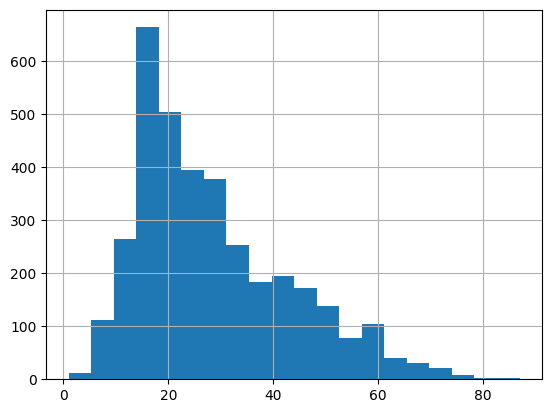

In [19]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')   #coerce the "Age" variable to numeric
df['Age'].hist(bins=20) #historgam

5. What proportion of victims are male?

In [20]:
#print(df['Sex'].head())
#print(df['Sex'].unique()) #output: ['M' 'F' nan ' M' 'M ' 'lli' 'M x 2']

df['Sex'] = df['Sex'].astype(str).str.strip() # remove strip spaces from values:' M', 'M ')
#print(df['Sex'].unique()) #output:['M' 'F' 'nan' 'lli' 'M x 2']

 #Replace incorrect values (like 'lli', 'M x 2') with NAN
df['Sex'] = df['Sex'].replace({'lli': np.nan, 'M x 2': 'M'})
#print(df['Sex'].unique()) #output: ['M' 'F' 'nan' nan]

#remove 'nan'
df['Sex'] = df['Sex'].replace({'nan': np.nan})
#print(df['Sex'].unique()) #output: ['M' 'F' nan]

male_proportion = (df['Sex'] == 'M').mean()
print(male_proportion)







0.787651154268963


6. Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [21]:
df['Type'].value_counts()

,count
Type,
Unprovoked,4055
Provoked,516
Invalid,402
Watercraft,280
Sea Disaster,156
Questionable,22
Boat,7
Provoked,2
?,1


In [27]:
df['Type'] = df['Type'].astype(str).str.strip()

df['Type'] = df['Type'].replace(['Sea Disaster', 'Boat', 'Boating', 'Watercraft','Invalid','Questionable','?','Unconfirmed','Unverified','Under investigation'],'Unknown')
print(df['Type'].value_counts())


unprovoked_ratio = (df['Type'] == 'Unprovoked').mean()
print(unprovoked_ratio)


Type
Unprovoked    4055
Unknown        885
Provoked       518
Name: count, dtype: int64
0.7429461341150605


7. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

In [28]:
df['Fatal Y/N'] = df['Fatal Y/N'].astype(str).str.strip()
#print(df['Fatal Y/N'].value_counts())
#output:N Y nan UNKNOWN  F M n Nq  2017  Y x 2

df['Fatal Y/N'] = df['Fatal Y/N'].replace(['F','M','2017','nan','Nq','Y x 2'],np.nan)
df['Fatal Y/N'] = df['Fatal Y/N'].replace('n','N')
print(df['Fatal Y/N'].value_counts())


Fatal Y/N
N          4186
Y           811
UNKNOWN      45
Name: count, dtype: int64


8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?


In [29]:
df['Sex'] = df['Sex'].astype(str).str.strip()
#print(df['Sex'].unique())

#Cross-tabulation of 'Sex' and 'Type'
sex_vs_attack = pd.crosstab(df['Sex'], df['Type'])
print(sex_vs_attack)

Type  Provoked  Unknown  Unprovoked
Sex                                
F           28       78         600
M          446      540        3313
nan         44      267         142


From the table above: Men experience significantly more unprovoked attacks than women.(3313> 600)


In [30]:
# Cross-tabulation of 'Type' and 'Fatal Y/N'
fatal_vs_type = pd.crosstab(df['Type'], df['Fatal Y/N'])

print(fatal_vs_type)

Fatal Y/N      N  UNKNOWN    Y
Type                          
Provoked     496        3   13
Unknown      366        6  119
Unprovoked  3324       36  679




*   Provoked Attacks: 13 fatal out of 514 cases → Fatality rate ≈ 2.5%
*   Unprovoked Attacks: 679 fatal out of 4042 cases → Fatality rate ≈ 16.8%

Thus, unprovoked attacks are far more likely to be fatal than provoked attacks.

In [31]:
# Cross-tabulation of 'Sex' and 'Fatal Y/N'
fatal_vs_sex = pd.crosstab(df['Sex'], df['Fatal Y/N'])

print(fatal_vs_sex)

Fatal Y/N     N  UNKNOWN    Y
Sex                          
F           560        2   87
M          3328       22  648
nan         298       21   76


*   Female Fatality Rate: 87 fatal out of 647 cases → 13.4%
*   Male Fatality Rate: 648 fatal out of 3976 cases → 16.3%

Thus, male victims more likely to die from a shark attack than female victims.


To sum up, sharks are more likely to launch unprovoked attacks on men than women, and unprovoked attacks have a higher fatality rate than provoked ones. Male victims are more likely to die from shark attacks than female victims.

9. What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [44]:
#df['Species'].value_counts() # I firstly tried this code, but it didn't work

print(df.columns) # So i use this code to check the issue
#The column name 'Species' has an extra space at the end ('Species '), so df['Species'] will raise a KeyError in my previous code
#Then, I want to remove trailing spaces from column names to prevent KeyError
df.columns = df.columns.str.strip()

# Convert the 'Species' column to lowercase and remove extra spaces
df['Species'] = df['Species'].astype(str).str.lower().str.strip()

# Split the 'species' column into separate words for better matching
df['Species_list'] = df['Species'].str.split()
#df['Species_list']

# Filter rows where the first word in 'Species_list' is "white"
white_shark_attacks = df[df['Species_list'].str[0] == "white"]
#print(white_shark_attacks )

# Calculate the proportion
proportion_white_sharks = len(white_shark_attacks) / len(df)
print(proportion_white_sharks)





Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Species_list'],
      dtype='object')
0.0710812356979405


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper focuses on a key aspect of data cleaning: data tidying. Tidy data follows a simple structure: each variable is a column, each observation is a row, and each type of observational unit forms a table. This approach simplifies handling untidy datasets and enables the development of effective data analysis tools. The abstract outlines the definition and benefits of data tidying, along with a case study demonstrating its advantages.

2. From the introduction part, we can know the tidy data standard could provide a standard way to organize data values within a dataset. And this standard is designed to Facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together, making the data analysis easier to do.

3.
The explanation of this sentence:


> "Like families, tidy datasets
are all alike but every messy dataset is messy in its own way."
*   Explanation: This sentence means that tidy datasets all follow the same clear structure, but messy datasets can be disorganized in many different ways. Tidy datasets provide a standardized way to link the structure of a dataset (its physical layout) with its semantics (its meaning). From this quote, it makes analysis easier. However, messy data can break these rules in different ways, such as "Column headers are values, not variable names" or "Multiple variables are stored in one column." That’s why every messy dataset requires a different way to clean it.


> "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
*   Explanation: Usually, it’s easy to tell what the variables and observations are in a dataset, as the text says, "For a given dataset, it’s usually easy to figure out what are observations and what are variables." But defining them generally is hard. For example, "If the columns in Table 1 were height and weight we would have been happy to call them variables. If the columns were height and width, it would be less clear cut." This shows that what we consider a variable depends on the situation, making it difficult to create a universal rule.







4. A dataset constitutes a gathering of values. These values can be either numeric or categorical/strings. Each value pertains to both a variable and an observation. A variable is an assemblage of values that gauge the identical attribute or property (such as height, color, temperature, make/model). An observation is a group of values that measure it.  

5. Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:
  (1) Each variable forms a column.
  (2)Each observation forms a row.
  (3) Each type of observational unit forms a table.

6. This section describes the five most common problems with messy datasets, along with their remedies:
(1)Column headers are values, not variable names.
(2)Multiple variables are stored in one column.
(3)Variables are stored in both rows and columns.
(4)Multiple types of observational units are stored in the same table. (5)A single observational unit is stored in multiple tables.


The data in Table 4 is messy because column headers are values instead of variable names. I quote the text explanation:

> A common type of messy dataset is tabular data designed for presentation, where variables form both the rows and columns, and column headers are values, not variable names.

To explain the meaning of "Melting", firstly I cite the definition of melting in article:
> Melting is parameterised by a list of columns that are already variables, or colvars for short. The other columns are converted into two variables: a new variable called column that contains repeated column headings and a new variable called value that contains the concatenated data values from the previously separate columns.

In the case of Table 4, melting would turn the income ranges (currently column names) into a single "income" column, and create a second column, "freq," to store the corresponding values. This process helps make the data tidy and easier to analyze.






7.
Table 11 is messy because days (d1, d2, etc.) are used as column
headers instead of being a single "date" variable. This makes the data harder to work with.

Table 12(a) is molten because it turns the days into a single column, "date," making the structure more organized. But it's still not tidy because the element column holds variable names (tmax, tmin) instead of actual data.

Table 12(b) is tidy because each row is a single day's observation, and each variable (date, tmax, tmin) has its own column. Now, all values are properly structured for easy analysis.

8.


> There is a chicken-and-egg problem with tidy data: if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data.

This is how author explains chicken-and-egg problem with tidy data, my understanding is if people only use tidy data because of existing tools like ggplot2 and dplyr as mentioned in article, then the concept of tidy data might just be a way to promote these tools rather than a fundamental approach to data organization.


Wickham wants tidy data to be more than just a tool-specific framework. He hopes it leads to a broader philosophy of data cleaning and organization. He states:


> While I hope that the tidy data framework is not one of those false starts, I also don’t see it as the final solution. I hope others will build on this framework to develop even better data storage strategies and better tools.

It's obvious to say that he wants tidy data to inspire new ideas, tools, and best practices in data science as a whole.




**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?